In [61]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
plt.style.use('ggplot')

In [2]:
iris_data = datasets.load_iris()

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df_data = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
df_target = pd.DataFrame(iris_data['target'], columns = iris_data['frame'])
iris_df = pd.concat([df_data, df_target], axis = 1)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df.rename(columns = {0: 'Species'}, inplace = True)

In [7]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [8]:
iris_df['Species'].unique()

array([0, 1, 2])

In [9]:
iris_df.loc[4, :]

sepal length (cm)    5.0
sepal width (cm)     3.6
petal length (cm)    1.4
petal width (cm)     0.2
Species              0.0
Name: 4, dtype: float64

In [10]:
iris_df.iloc[:2, 1:]

,sepal width (cm),petal length (cm),petal width (cm),Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0


In [11]:
iris_df.loc[2:6, [a for a in iris_df.columns if 'width' in a]]

,sepal width (cm),petal width (cm)
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
5,3.9,0.4
6,3.4,0.3


In [12]:
iris_df.Species.unique()

array([0, 1, 2])

In [13]:
iris_df[iris_df['Species'] == 2].head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [14]:
iris_df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
Species              150
dtype: int64

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [17]:
iris_df.corr(method = 'spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
Species,0.798078,-0.440290,0.935431,0.938179,1.000000


Text(0.5, 1.01, 'Iris Petal Width')

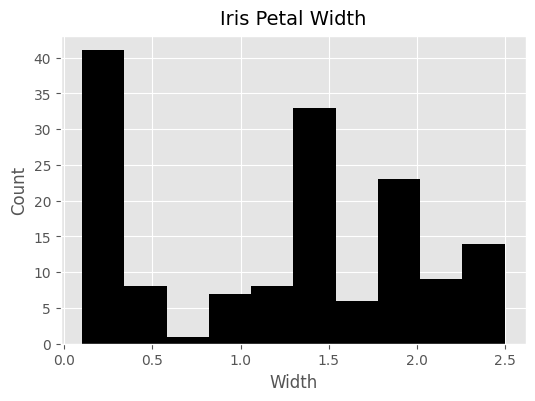

In [18]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.hist(iris_df['petal width (cm)'], color = 'black')
ax.set_xlabel('Width', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.title('Iris Petal Width', fontsize = 14, y = 1.01)

Text(0.5, 1.0, 'Petal Scatter Plot')

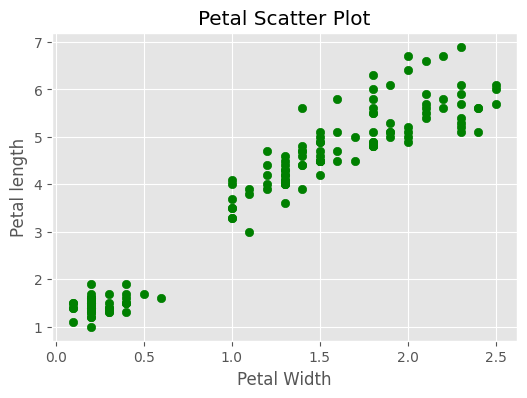

In [19]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.scatter(iris_df['petal width (cm)'], iris_df['petal length (cm)'], color = 'g')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal length')
plt.title('Petal Scatter Plot')

Text(0.5, 1.0, 'Petal lenght plot')

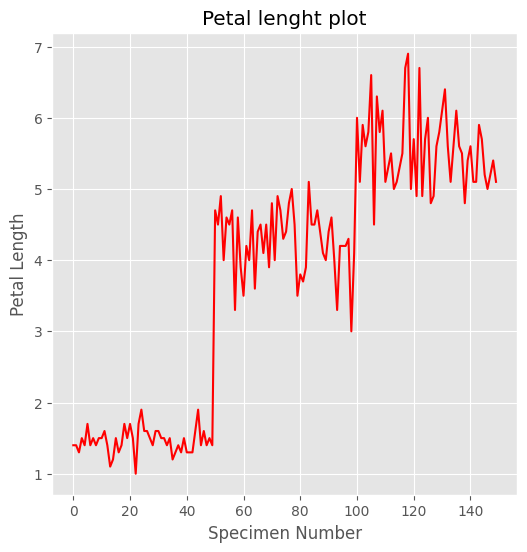

In [20]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.plot(iris_df['petal length (cm)'], color = 'r')
ax.set_xlabel('Specimen Number')
ax.set_ylabel('Petal Length')
plt.title('Petal lenght plot')

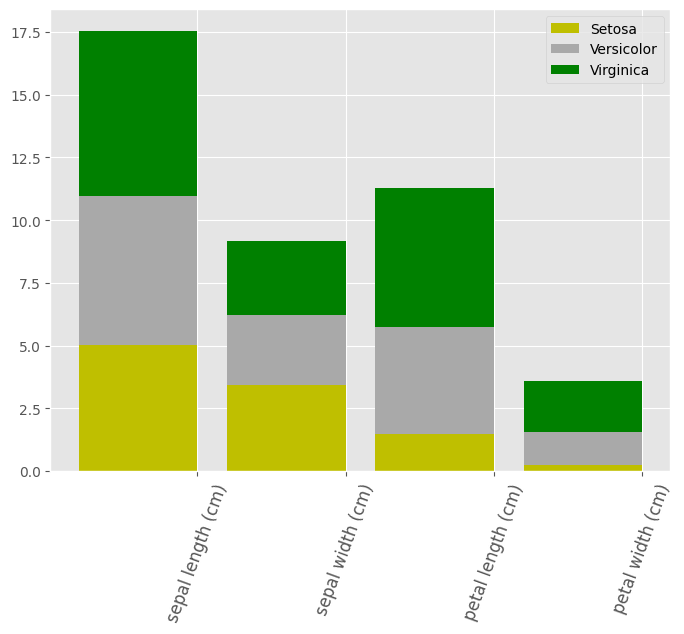

In [21]:
fig, ax = plt.subplots(figsize = (8, 6))
bar_width = 0.8
labels = [x for x in iris_df.columns if 'length' in x or 'width' in x]
# labels
set_y = [iris_df[iris_df['Species'] == 0][x].mean() for x in labels]
ver_y = [iris_df[iris_df['Species'] == 1][x].mean() for x in labels]
vir_y = [iris_df[iris_df['Species'] == 2][x].mean() for x in labels]

x = np.arange(len(labels))
ax.bar(x, set_y, bar_width, color = 'y')
ax.bar(x, ver_y, bar_width, bottom = set_y, color = 'darkgrey')
ax.bar(x, vir_y, bar_width, bottom = [i+j for i, j in zip(set_y, ver_y)], color = 'green')

ax.set_xticks(x + (bar_width/2))
ax.set_xticklabels(labels, rotation = 70, fontsize = 12)
ax.legend(['Setosa', 'Versicolor', 'Virginica'])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


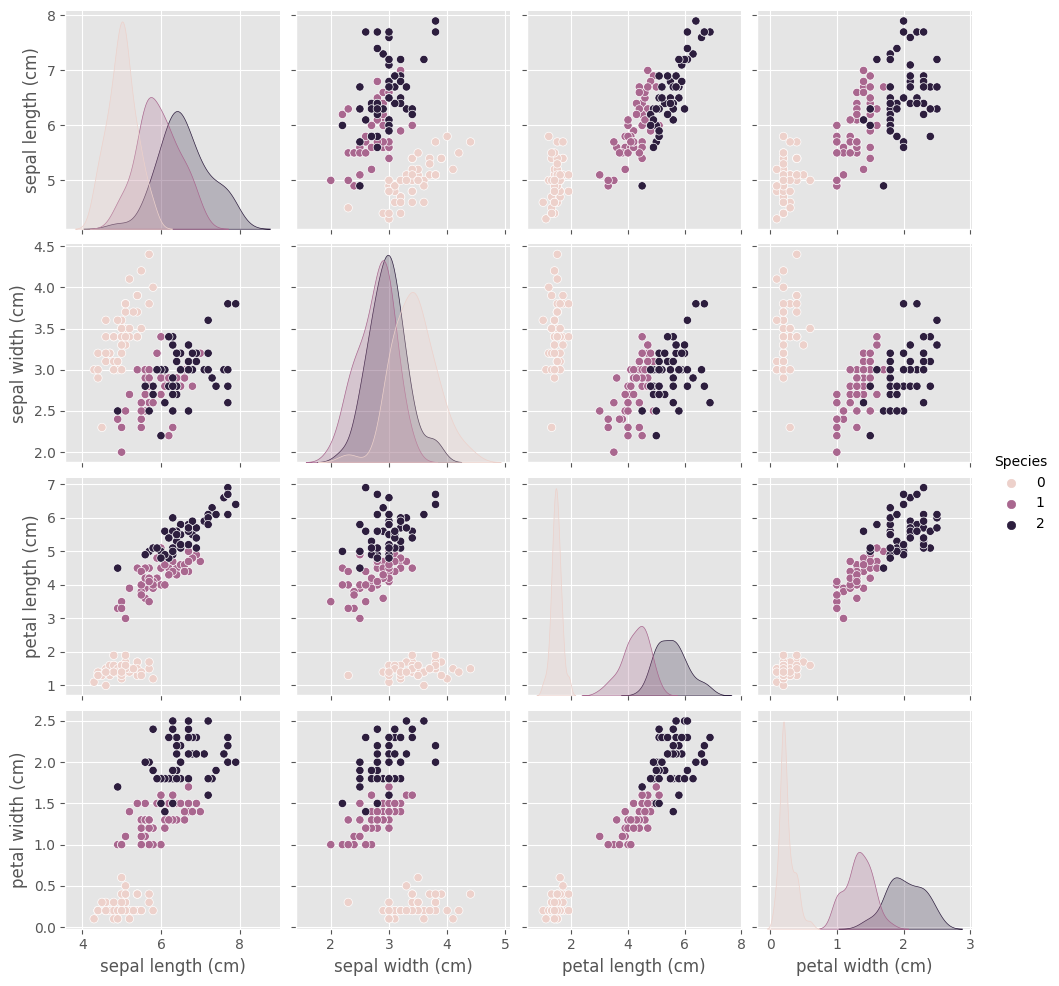

In [22]:
sns.pairplot(iris_df, hue = 'Species')

# Preparation

### map() method

In [23]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
iris_df['Species'] = iris_df['Species'].map({0 : 'SET', 1 : 'VER', 2 : 'VIR'})

In [25]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,SET
1,4.9,3.0,1.4,0.2,SET
2,4.7,3.2,1.3,0.2,SET
3,4.6,3.1,1.5,0.2,SET
4,5.0,3.6,1.4,0.2,SET


### apply() method

In [26]:
iris_df['petal width (cm)'].mean()

1.1993333333333336

In [49]:
iris_df['wide petal'] = iris_df['petal width (cm)'].apply(lambda v: 1 if v >= 1.2 else 0)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28


In [34]:
iris_df['petal area'] = iris_df.apply(lambda r: r['petal width (cm)'] * r['petal length (cm)'], axis = 1)

Autre methode pour appliquer apply dans ce contexte

In [38]:
def new(r):
    return r['petal width (cm)'] * r['petal length (cm)'] 

In [40]:
iris_df['New column'] = iris_df.apply(new, axis = 1)

In [43]:
iris_df.drop(columns = 'New column', axis = 1, inplace = True)

### applymap() method

In [48]:
iris_df.applymap(lambda x: np.log(x) if isinstance(x, float) else x)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,wide petal,petal area
0,1.629241,1.252763,0.336472,-1.609438,SET,0,-1.272966
1,1.589235,1.098612,0.336472,-1.609438,SET,0,-1.272966
2,1.547563,1.163151,0.262364,-1.609438,SET,0,-1.347074
3,1.526056,1.131402,0.405465,-1.609438,SET,0,-1.203973
4,1.609438,1.280934,0.336472,-1.609438,SET,0,-1.272966
...,...,...,...,...,...,...,...
145,1.902108,1.098612,1.648659,0.832909,VIR,1,2.481568
146,1.840550,0.916291,1.609438,0.641854,VIR,1,2.251292
147,1.871802,1.098612,1.648659,0.693147,VIR,1,2.341806
148,1.824549,1.223775,1.686399,0.832909,VIR,1,2.519308


### groupby() method

In [52]:
iris_df.groupby('Species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),wide petal,petal area
Species,,,,,,
SET,5.006,3.428,1.462,0.246,0.0,0.3656
VER,5.936,2.770,4.260,1.326,0.8,5.7204
VIR,6.588,2.974,5.552,2.026,1.0,11.2962


In [56]:
#Methode to_frame() qui transforme en dataframe qqch
# iris_df.groupby('petal width (cm)')['Species'].unique().to_frame()

# Modeling and Evaluation

Text(0.5, 1.0, 'Setosa sepal width vs sepal length')

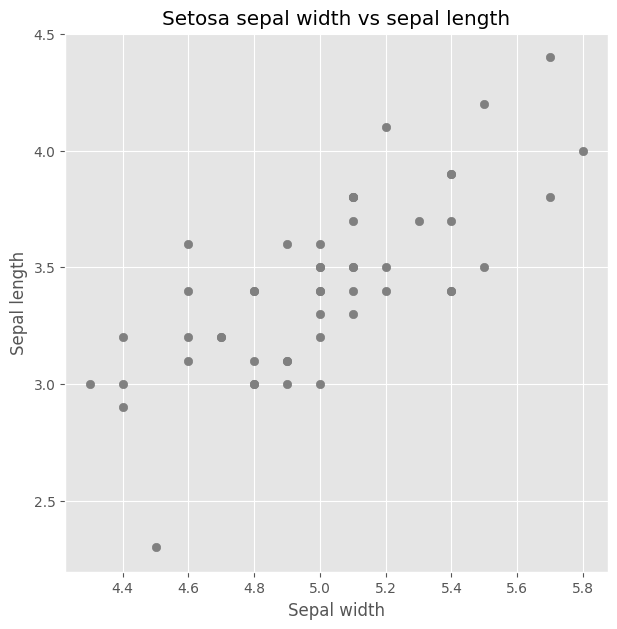

In [58]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(iris_df['sepal length (cm)'][:50], iris_df['sepal width (cm)'][:50], color = 'gray')
ax.set_xlabel('Sepal width')
ax.set_ylabel('Sepal length')
plt.title('Setosa sepal width vs sepal length')

In [65]:
y = iris_df['petal width (cm)'][:50]
x = iris_df['sepal length (cm)'][:50]
X = sm.add_constant(x)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       petal width (cm)   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     4.023
Date:                Sat, 14 Oct 2023   Prob (F-statistic):             0.0505
Time:                        16:59:35   Log-Likelihood:                 44.077
No. Observations:                  50   AIC:                            -84.15
Df Residuals:                      48   BIC:                            -80.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1702      0.208     -0.818      0.417      -0.588       0.248
sepal length (cm)     0.0831      0.041      2.006      0.051      -0.000       0.166
==============================================================================
Omnibus:                       15.661   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.400
Skew:                           1.193   Prob(JB):                     0.000101
Kurtosis:                       4.772   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""